In [1]:
%pylab inline
from astropy.io import ascii, fits
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs import WCS

Populating the interactive namespace from numpy and matplotlib


## CO Map

In [2]:
comap = fits.open("ico.fits")
comapdata = comap[0].data[0,0]
#size (x,y) of the CO map data array
lencox, lencoy = comapdata.shape
#Filtering -- here we filter out n}ns and any value less than "thresh"
thresh = 0
mask = np.isnan(comapdata) | (comapdata<=thresh) # A Boolean (True/False) array
#Set all the above values to nan
comapdata[mask] = nan
#Get the world coordinates for the CO map
comapheader = comap[0].header
wc = wcs.WCS(comapheader, naxis=2)

## SNRs

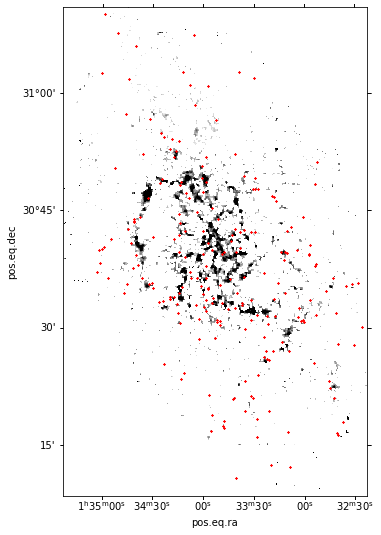

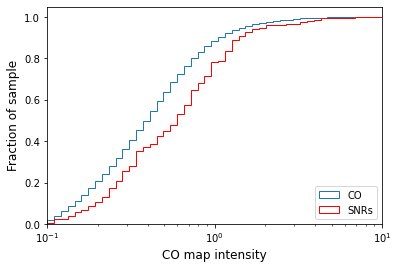

In [3]:
#Read ASCII table
snrtab = ascii.read("snrs.tsv", data_start=3)
#Get sky coordinates of snrs
snrcoords = SkyCoord(snrtab["RAJ2000"], snrtab["DEJ2000"], unit=("hourangle", "deg"))
#Convert sky coordinates to pixels using world coordinate system defined earlier
#np.asarray converts the list into a numpy array with data-type "int". Numpy arrays
#are much easier to manipulate than Python lists
snrpix = np.asarray(skycoord_to_pixel(snrcoords, wc), dtype=int)
#Only keep SNR pixels that fall inside the CO map area
#This line below uses the list comprehension trickery of Python! Its the equivalent of writing
snrpix_insideco = np.array([[i,j] for i,j in snrpix.T if ((0<=j<lencox) and (0<=i<lencoy))]).T

#Show the snrs on the CO map
plt.figure(figsize=(9,9))
plt.subplot(projection=wc)
plt.imshow(comapdata, vmin=0, vmax=2, cmap="gist_gray_r")
plt.scatter(snrpix_insideco[0], snrpix_insideco[1], marker="x", s=2, color="r")
plt.show()

#Get CO intensity values for the SNR pixels
snrco = comapdata[snrpix_insideco[1], snrpix_insideco[0]]

#Plot 
plt.figure()
plt.hist(comapdata.flatten(), histtype="step", density=True, cumulative=True, bins=np.logspace(-1, 1, 50),
        label="CO")
plt.hist(snrco, histtype="step", color="r", density=True, cumulative=True, bins=np.logspace(-1, 1, 50),
        label="SNRs")
plt.xlabel("CO map intensity", fontsize=12)
plt.ylabel("Fraction of sample", fontsize=12)
plt.xscale("log")
plt.xlim(0.1, 10)
plt.legend(loc=4)
plt.show()



## NCR Function

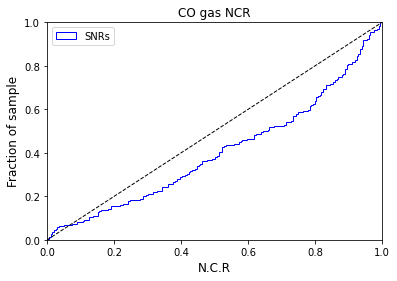

In [4]:
def get_ncr(data, vals):
    """
    Iterates over "vals" and return 
    NCR value or the index/array-size, 
    as Ness had mentioned.
    """
    #This again uses list comprehension
    #This iterates
    return np.array([np.where(data>=x)[0][0]/len(data) for x in vals if not np.isnan(x)])

#Sorted CO map data
comapdata_sorted = np.sort(comapdata.flatten())
#Exclude nans
comapdata_sorted_nonan = comapdata_sorted[~np.isnan(comapdata_sorted)]
#Get NCR of snrs
ncr_snrco = get_ncr(comapdata_sorted_nonan, snrco)

plt.figure()
plt.hist(ncr_snrco, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="SNRs")
plt.ylabel("Fraction of sample", fontsize=12)
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200), "k--", lw=1.0)
plt.title('CO gas NCR')
plt.xlabel("N.C.R", fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.show()

In [5]:
ncr_snrco

array([5.13935974e-01, 8.14861793e-01, 4.47647528e-01, 7.83389579e-01,
       7.29900653e-01, 3.21151367e-01, 2.76897571e-01, 3.64838859e-01,
       5.16472816e-01, 8.59571709e-01, 9.49327224e-01, 7.38185107e-01,
       8.82216226e-01, 7.13375307e-01, 8.11353777e-01, 8.74354579e-01,
       6.61290612e-01, 3.08085351e-02, 8.59246276e-01, 8.34349351e-01,
       9.43530925e-01, 7.14108172e-01, 1.05668432e-01, 6.64470633e-01,
       8.90113748e-01, 9.32591756e-01, 1.82129871e-01, 8.22577380e-01,
       7.88168580e-01, 9.45181154e-01, 4.64218999e-01, 9.02042030e-01,
       3.28426210e-01, 4.32954345e-01, 9.39225981e-01, 2.43406133e-01,
       9.96143488e-01, 7.90177553e-01, 8.93678139e-01, 9.43797422e-01,
       1.92448924e-01, 9.52827554e-02, 5.67073843e-03, 8.86154737e-01,
       9.92571410e-01, 9.22836445e-01, 8.24427481e-01, 8.62321236e-01,
       9.94254950e-01, 9.75477195e-01, 8.97534651e-01, 7.48445223e-01,
       7.46646372e-01, 9.26772394e-01, 4.57021030e-01, 1.39349492e-01,
      

## Atomic Map

In [6]:
atomicmap = fits.open("atomic.fits")
atomicmapdata = atomicmap[0].data
#size (x,y) of the atomic map data array
lenatomicx, lenatomicy = atomicmapdata.shape
#Filtering -- here we filter out nans and any value less than "thresh"
thresh = 0
mask = np.isnan(atomicmapdata) | (atomicmapdata<=thresh) # A Boolean (True/False) array
#Set all the above values to nan
atomicmapdata[mask] = nan
#Get the world coordinates for the CO map
atomicmapheader = atomicmap[0].header
wc2 = wcs.WCS(atomicmapheader, naxis=2)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


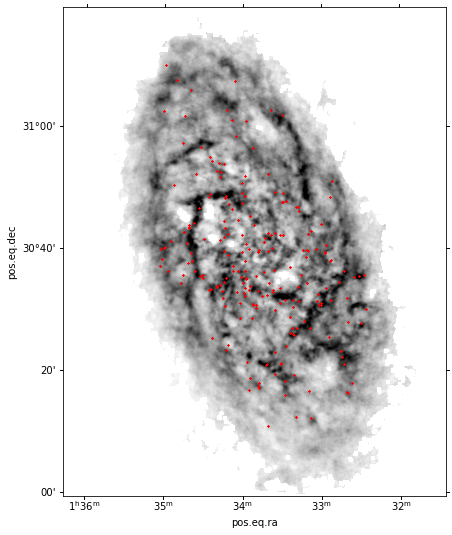

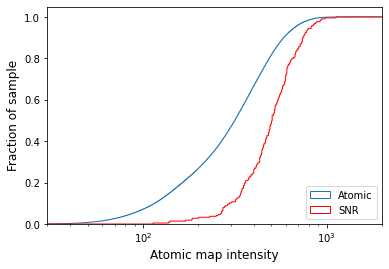

In [7]:
snrpix = np.asarray(skycoord_to_pixel(snrcoords, wc2), dtype=int)
snrpix_insideatomic = np.array([[i,j] for i,j in snrpix.T if ((0<=j<lenatomicx) and (0<=i<lenatomicy))]).T


#Show the SNRs on the atomic map
plt.figure(figsize=(9,9))
plt.subplot(projection=wc2)
plt.imshow(atomicmapdata, vmin=20, vmax=900, cmap="gist_gray_r")
plt.scatter(snrpix_insideatomic[0], snrpix_insideatomic[1], marker="x", s=2, color="r")
plt.show()


#Get atomic intensity values for the RSG pixels
snratomic = atomicmapdata[snrpix_insideatomic[1], snrpix_insideatomic[0]]

#Plot 
plt.figure()
plt.hist(atomicmapdata.flatten(), histtype="step", density=True, cumulative=True, bins=np.logspace(0, 4, 1000),
        label="Atomic")
plt.hist(snratomic, histtype="step", color="r", density=True, cumulative=True, bins=np.logspace(0, 4, 1000),
        label="SNR")
plt.xlabel("Atomic map intensity", fontsize=12)
plt.ylabel("Fraction of sample", fontsize=12)
plt.xscale("log")
plt.xlim(30, 2000)
plt.legend(loc=4)
plt.show()


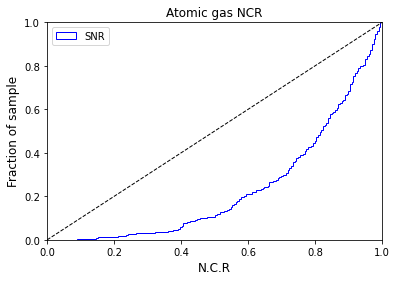

In [10]:
#Sorted atomic map data
atomicmapdata_sorted = np.sort(atomicmapdata.flatten())
#Exclude nans
atomicmapdata_sorted_nonan = atomicmapdata_sorted[~np.isnan(atomicmapdata_sorted)]
#Get NCR of snrs
ncr_snratomic = get_ncr(atomicmapdata_sorted_nonan, snratomic)

plt.figure()
plt.hist(ncr_snratomic, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="SNR")
plt.ylabel("Fraction of sample", fontsize=12)
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200), "k--", lw=1.0)
plt.title('Atomic gas NCR')
plt.xlabel("N.C.R", fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.show()

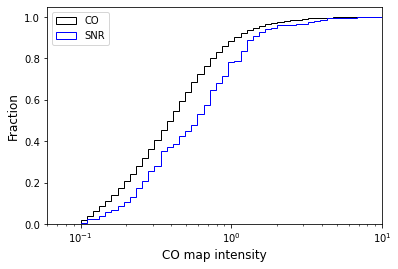

In [9]:
plt.hist(comapdata.flatten(), histtype="step", color="k", \
         density=True, cumulative=True, bins=np.logspace(-1, 1, 50), label="CO")
plt.hist(snrco, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.logspace(-1, 1, 50), label="SNR")
plt.xlabel("CO map intensity", fontsize=12)
plt.ylabel("Fraction", fontsize=12)
plt.xscale("log")
plt.xlim(0.06, 10)
plt.legend(loc=2)
plt.show()